In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [97]:
train_df = pd.read_csv('/Users/jacobjones/github/datasci207_final_project/data/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [98]:
print("The Shape of the training data:")
train_df.shape

The Shape of the training data:


(1460, 81)

In [99]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


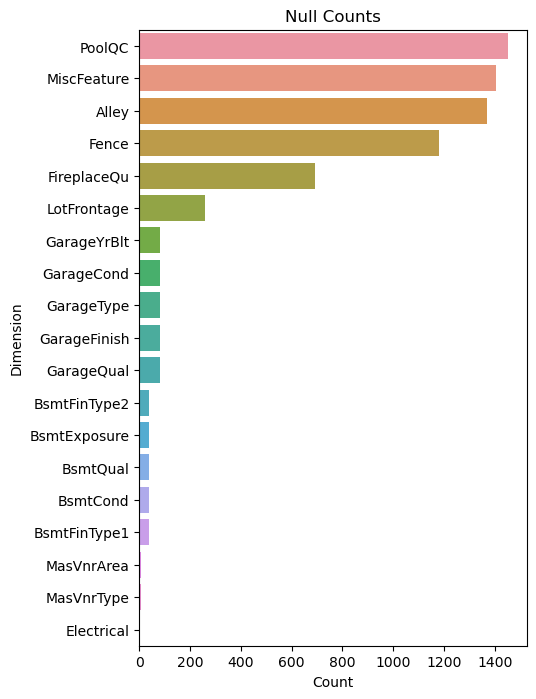

In [100]:
nulls = train_df.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls>0]
plt.figure(figsize=(5,8))
ax = sns.barplot(y = nulls.index, x = nulls, orient = "h").set_title("Null Counts")
plt.xlabel("Count")
plt.ylabel("Dimension")
plt.show()

In [101]:
train_df[nulls.index].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [102]:
#check to see if any 99s exist
(train_df == -99).sum().sort_values()

Id              0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
Exterior1st     0
RoofMatl        0
RoofStyle       0
Heating         0
SalePrice       0
Length: 81, dtype: int64

In [103]:
train_df = train_df.fillna(-99)

/var/folders/_9/87z264rx0txbqbl8h56sjwz00000gn/T/ipykernel_28454/271158234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


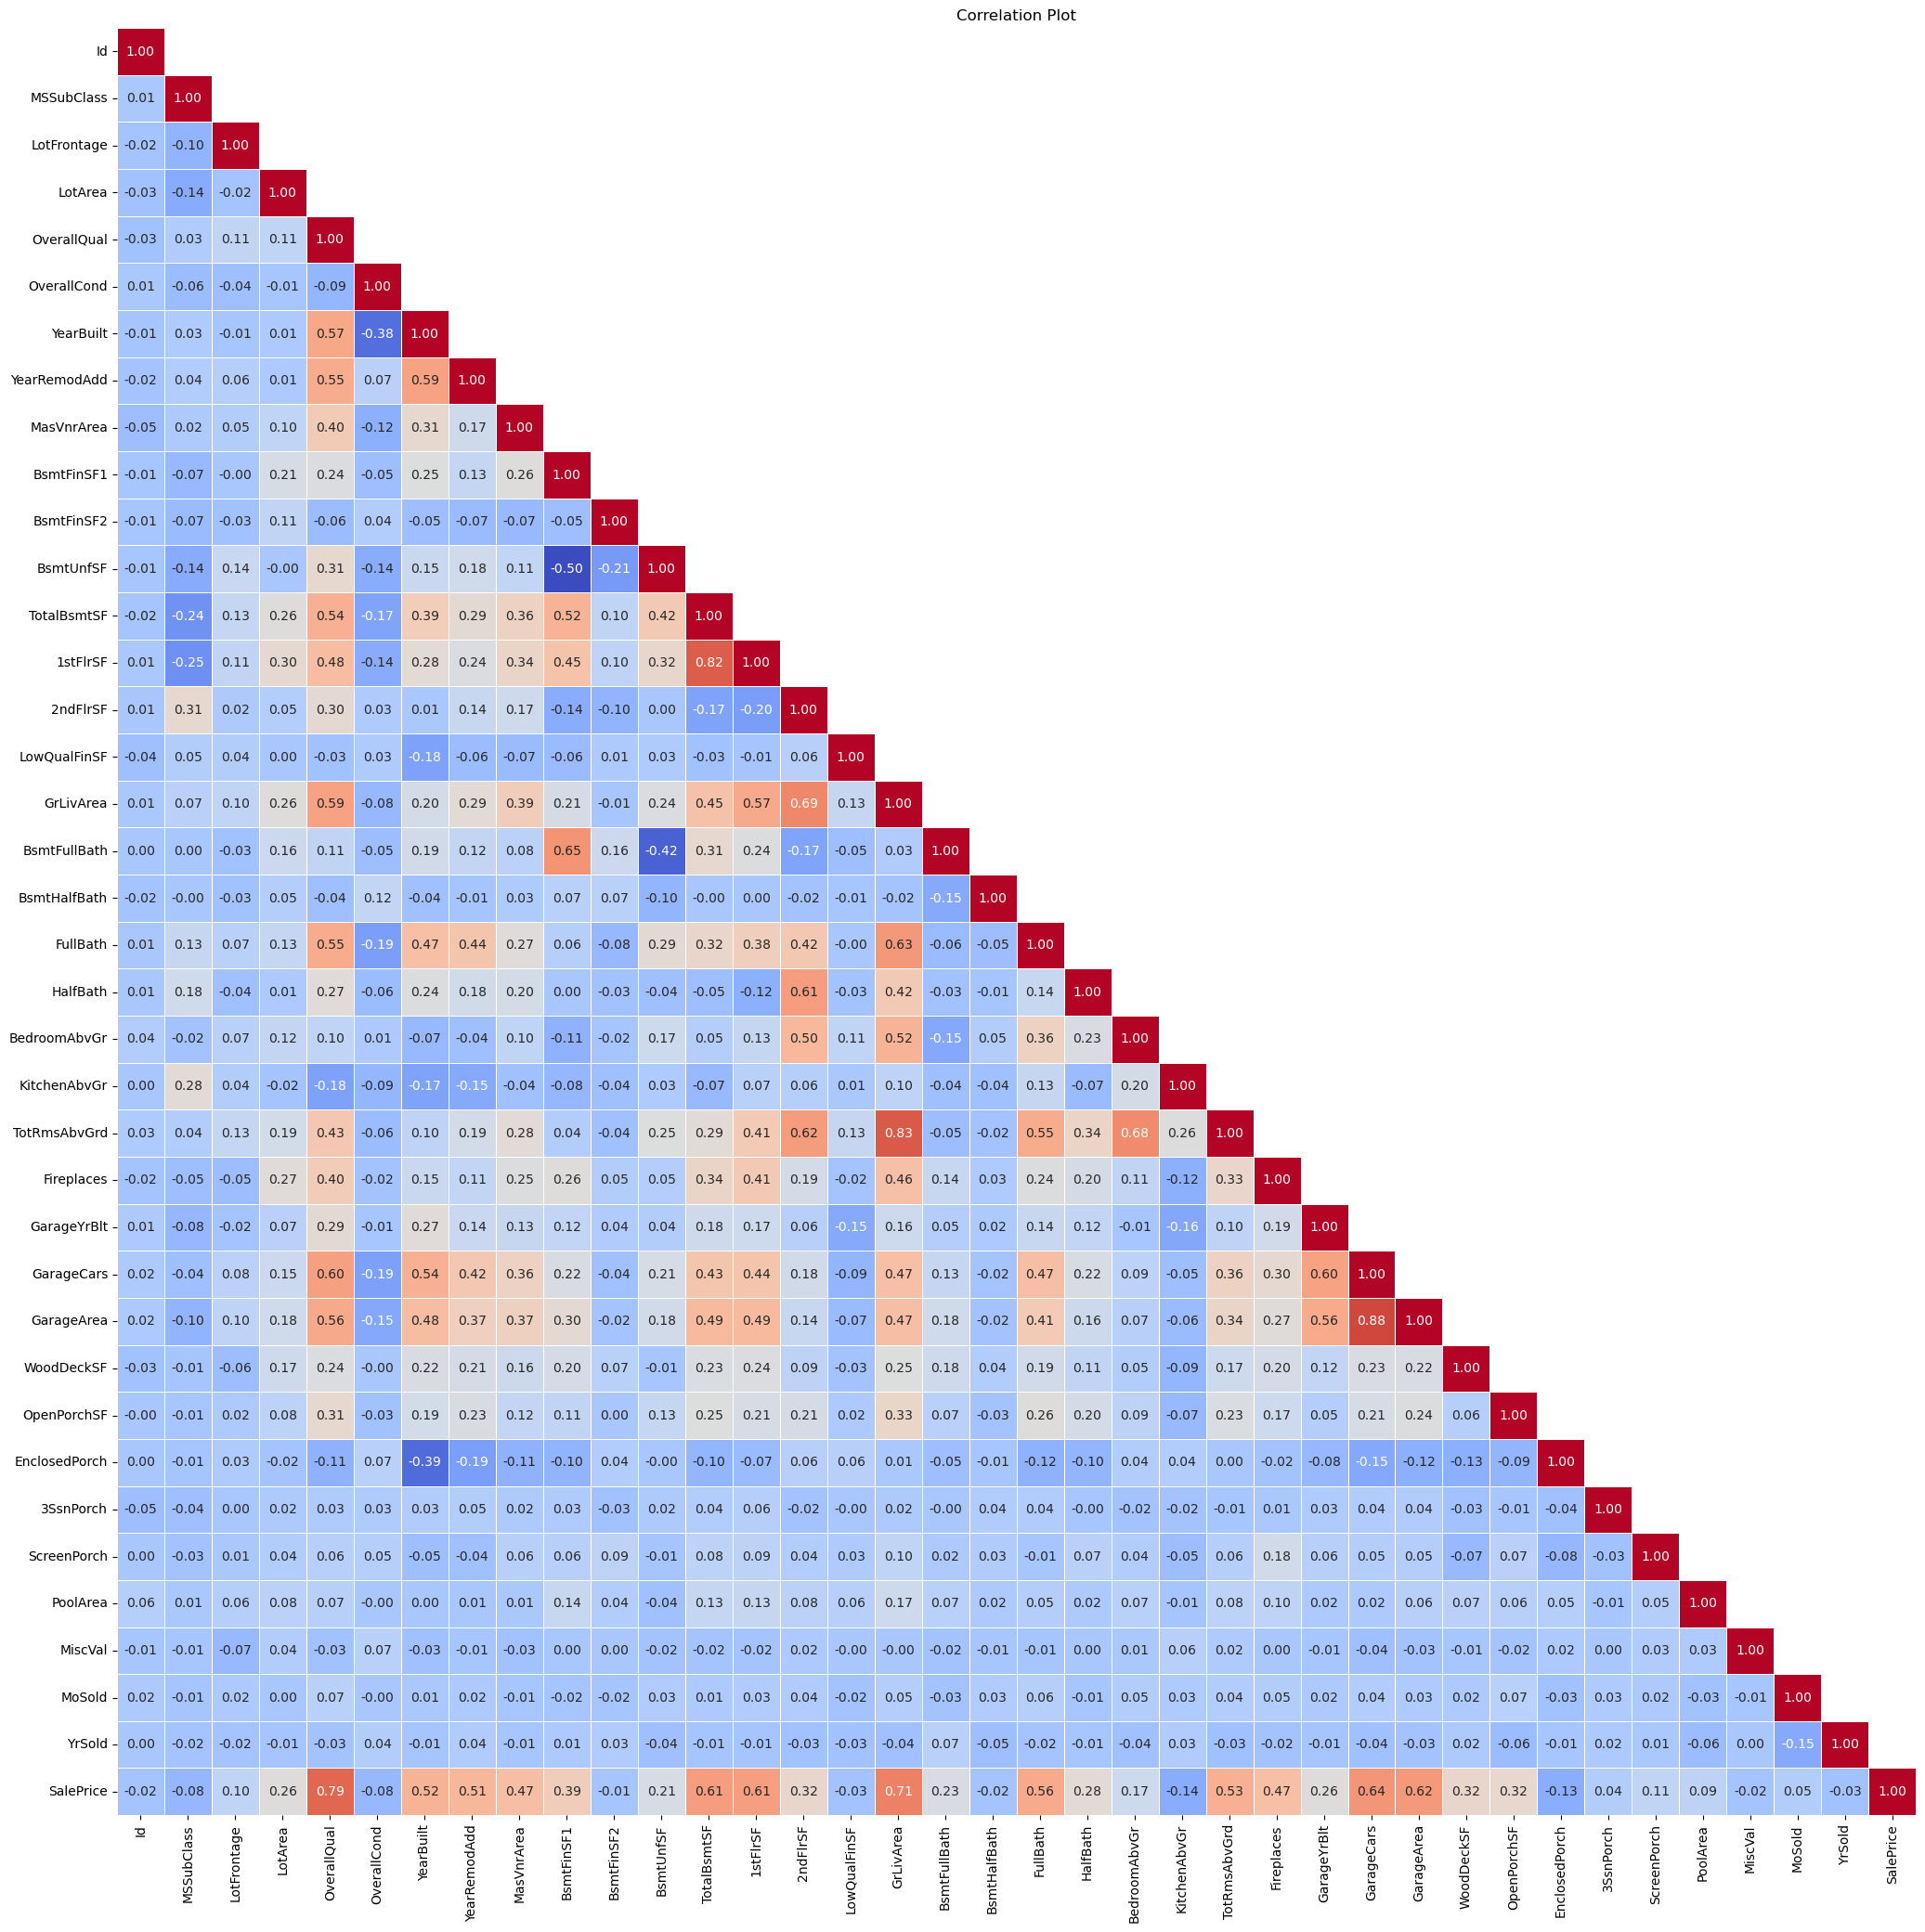

In [104]:
correlation_matrix = train_df.corr()

lower_triangle = np.tril(correlation_matrix)
mask = np.where(lower_triangle == 0, True, False)

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True), fmt=".2f", linewidths=.5,cbar=False,mask=mask).set_title("Correlation Plot")

plt.show()

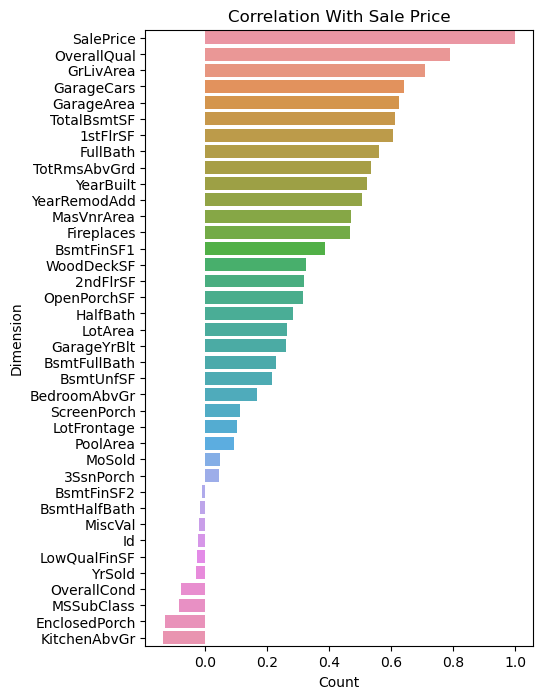

In [110]:
sale_corr = correlation_matrix.SalePrice.sort_values(ascending=False)

plt.figure(figsize=(5,8))
ax = sns.barplot(y = sale_corr.index, x = sale_corr, orient = "h").set_title("Correlation With Sale Price")
plt.xlabel("Count")
plt.ylabel("Dimension")
plt.show()

In [120]:
Y = train_df.SalePrice
X = train_df.OverallQual
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          2.19e-313
Time:                        16:40:40   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

In [121]:
print(results.params)

const         -96206.079515
OverallQual    45435.802593
dtype: float64


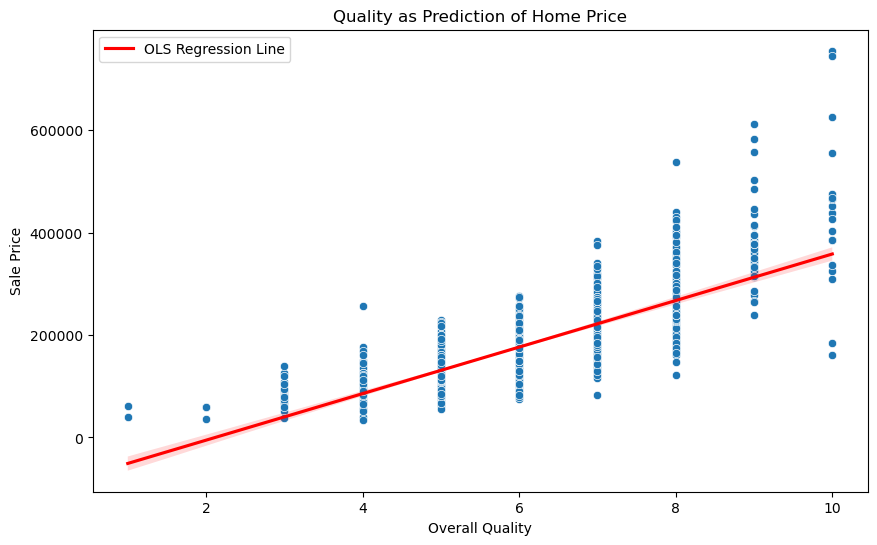

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['OverallQual'], y=Y)
sns.regplot(x=X['OverallQual'], y=Y, color='red', scatter=False, ci=95, label='OLS Regression Line').set_title('Quality as Prediction of Home Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

<Axes: >

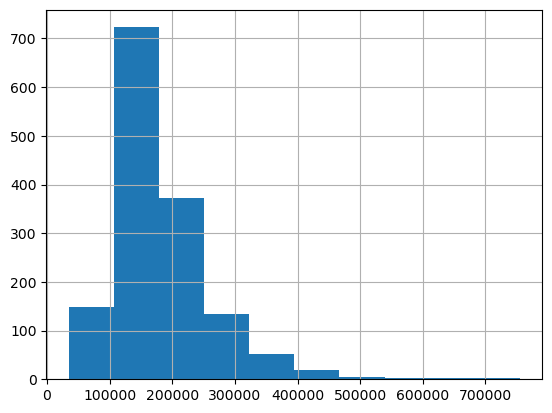

In [111]:
train_df.SalePrice.hist()

<Axes: >

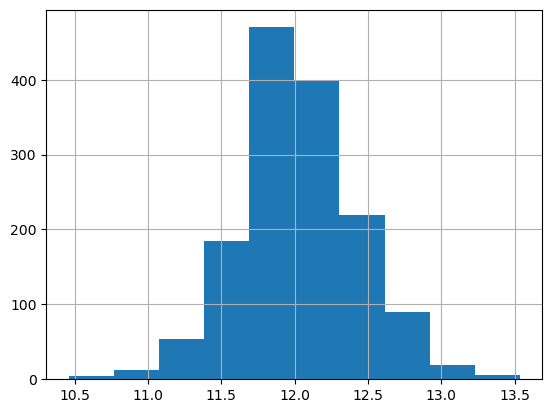

In [126]:
np.log(train_df.SalePrice).hist()


In [ ]:
# we will want to remove the ID
# log transform price?
